# Mesh_size analysis

Closest coordinate is 
 (245.69, 0.09, 20.0) 
 (-125.0, 212.89, 20.0) 
 (-124.59, -213.75, 20.0) 
Please open the xdmf file in paraview, and find the labels for above three nodes and input as 
T_3_labels = [label1, label2, label3]. 
Please also add in labels dictionary, functions in brake_disc_functions.py 
label success
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/Backward_Euler/change_k/mesh_sensitivity/hexa/s-1213-d-112-m-3-15-c-1-e-56793/Result_T-s-1213-d-112-m-3-15-c-1-e-56793.csv


TypeError: 'NoneType' object is not subscriptable

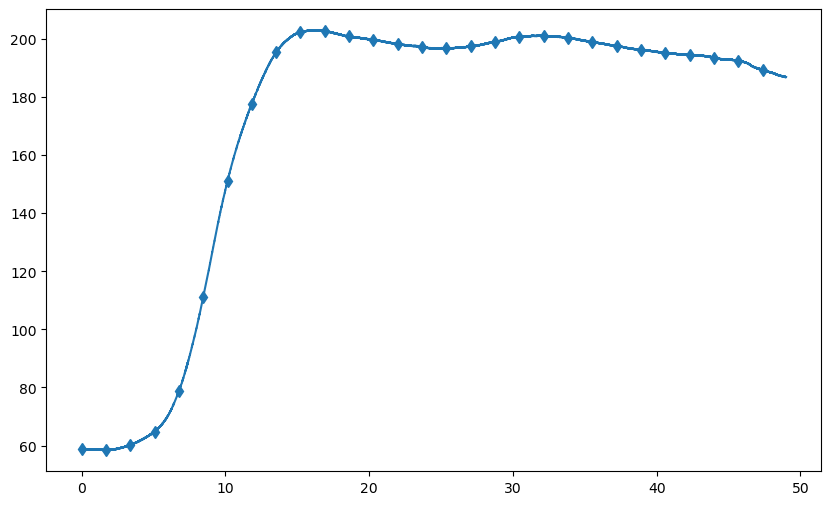

In [2]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/yanjun/Documents/FEniCSx/Project/Disc_thermal/Backward_Euler/hexahedral/')

from brake_disc_functions import *

source_dir = '/home/yanjun/Documents/FEM_results/python_results/Backward_Euler/change_k/mesh_sensitivity/hexa/'
#destination_dir = '/home/yanjun/Documents/FEniCSx/Project/python_analysis/mesh_size/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))
df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Project/Results/2_python_analysis/1_Euler_backward/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<','d' ] 

for csv_file in csv_files:
    lables = find_3_coord(  extract_mesh_labels(csv_file), "hexahedral" )
    print(f"label success")
    #t,T = read_t_T (os.path.basename(csv_file))
    t,T = read_t_T ( csv_file )
    
    T_3_ave = []
    for i in range(len(T)):
        T_3_all =  T[i][ lables[0] ] + T[i][ lables[1] ] + T[i][ lables[2] ]   
        T_3_ave.append ( T_3_all / 3 )
    plt.plot(t,pd.Series(T_3_ave).rolling(window=30).mean(),label= f'mesh size { extract_file_labels(csv_file, type1)  }',
             marker=marker_styles[j], markevery=100)
    j += 1


labels=['mesh size 1184080','mesh zize 3852374']
k = 0


plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()


In [3]:
print(lables)

None


In [ ]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise/Backward_Euler/change_k/')

from brake_disc_functions import *

source_dir = '/home/yanjun/Documents/FEM_results/python_results/Backward_Euler/change_k/mesh_size/'                

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Project/python_analysis/experiment_result.csv')
T_e_max = np.maximum( np.maximum (df1.iloc[:,1], df1.iloc[:,3]) , df1.iloc[:,5] ) 
t_e = np.linspace (0, 49, len(T_e_max) )
plt.plot(t_e, T_e_max, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<', 'd' ] 

for csv_file in csv_files[2:8]:

    #t,T = read_t_T (os.path.basename(csv_file), )
    t,T = read_t_T ( csv_file )

    T_max = []
    for i in range(len(T)):
        T_max.append( max(T[i]) )
    plt.plot(t,pd.Series(T_max).rolling(window=20).mean(),
             label= f'mesh size { extract_file_labels(csv_file, type1)  }', marker=marker_styles[j], markevery=100 )
    j += 1


plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_max_time_step.png')
plt.show()


In [ ]:
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise')

from brake_disc_functions import *



In [ ]:
print(df)

In [ ]:
df1 = pd.read_csv( csv_files[0] )
df2 = pd.read_csv( csv_files[1] )
df3['avg(f)'] = df1['avg(f)'] - df2['avg(f)']
plt.plot( df3['avg(f)'].rolling(window = 100).mean() )

In [7]:
print(csv_files)

['/home/yanjun/Documents/FEM_results/python_results/Forward_Euler/hexa/s-1213-d-112-m-3-15-c-1-e-56793/Result_T-s-1213-d-112-m-3-15-c-1-e-56793.csv', '/home/yanjun/Documents/FEM_results/python_results/Forward_Euler/hexa/s-1213-d-112-m-3-10-c-1-e-168466/Result_T-s-1213-d-112-m-3-10-c-1-e-168466.csv', '/home/yanjun/Documents/FEM_results/python_results/Forward_Euler/hexa/s-1213-d-112-m-3-7-c-1-e-436556/Result_T-s-1213-d-112-m-3-7-c-1-e-436556.csv', '/home/yanjun/Documents/FEM_results/python_results/Forward_Euler/hexa/T-s-1213-d-112-m-3-5-c-1-e-1063921/Result_T-s-1213-d-112-m-3-5-c-1-e-1063921.csv']
